<h4>Prediction of collision based on car collision data from Seattle</h4>

<h3>Background/problem</h3>

<p>Background
During 2019, almost 40 thousand people lost their lives to car crashes solely in the U.S. and even though in recent years the mortality rate has been declining, it is still a leading cause of death. The odds of dying in a car crash in the US are of one in 103. 
Being able to identify and predict when car crashes will occur, allows people to avoid certain roads, take extra precautions when driving under certain weather conditions and even alert authorities and manufacturers of trends and risk factors that could translate into policies and design improvements to help save lives. </p>


<p>Motor vehicle road accidents is a leading cause of death, and having enough data accounting for location, vehicle characteristics, road and weather conditions as well as the outcome (severity of car crash) can be used to build a model that predicts the chances of a high severity car crash to occur under certain conditions.
As previously stated, this is particularly relevant for authorities, Emergency response teams and car makers. That could benefit from having this predictive model in place.
</p>

In [1]:
#Exploratory Data Analysis
from typing import Any, Union

import pandas as pd
import numpy as np
from pandas import DataFrame, Series
from pandas.io.parsers import TextFileReader

df=pd.read_csv("D:\\MCC\\DS-projects\\datasets\Data-Collisions.csv",sep=',', error_bad_lines=False, index_col=False)


C:\Users\andre\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
#COUNT EMPTY VALUES PER COLUMN
df.isna().sum()


SEVERITYCODE           0
X                   5334
Y                   5334
OBJECTID               0
INCKEY                 0
COLDETKEY              0
REPORTNO               0
STATUS                 0
ADDRTYPE            1926
INTKEY            129603
LOCATION            2677
EXCEPTRSNCODE     109862
EXCEPTRSNDESC     189035
SEVERITYCODE.1         0
SEVERITYDESC           0
COLLISIONTYPE       4904
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
INCDATE                0
INCDTTM                0
JUNCTIONTYPE        6329
SDOT_COLCODE           0
SDOT_COLDESC           0
INATTENTIONIND    164868
UNDERINFL           4884
WEATHER             5081
ROADCOND            5012
LIGHTCOND           5170
PEDROWNOTGRNT     190006
SDOTCOLNUM         79737
SPEEDING          185340
ST_COLCODE            18
ST_COLDESC          4904
SEGLANEKEY             0
CROSSWALKKEY           0
HITPARKEDCAR           0
dtype: int64

In [3]:
df=df.drop(["ST_COLCODE","PEDCOUNT","PEDCYLCOUNT",
            "SEVERITYCODE.1","STATUS","COLDETKEY",
            "SEVERITYDESC","ST_COLDESC","HITPARKEDCAR",
            "CROSSWALKKEY","INATTENTIONIND","SPEEDING",
            "SEGLANEKEY","SDOTCOLNUM","PEDROWNOTGRNT",
            "SDOT_COLDESC","SDOT_COLCODE","EXCEPTRSNDESC",
            "OBJECTID","EXCEPTRSNCODE","INTKEY","INCKEY",
            "REPORTNO"],axis=1)

df_complete=df.dropna(subset=["X","Y","COLLISIONTYPE",
                              "JUNCTIONTYPE","WEATHER",
                              "ROADCOND","LIGHTCOND",
                              "LOCATION","ADDRTYPE"])
df_complete.describe()

,SEVERITYCODE,X,Y,PERSONCOUNT,VEHCOUNT
count,180067.000000,180067.000000,180067.000000,180067.000000,180067.000000
mean,1.309935,-122.330462,47.619501,2.479405,1.974498
std,0.462468,0.029977,0.056331,1.369008,0.560060
min,1.000000,-122.419091,47.495573,0.000000,0.000000
25%,1.000000,-122.348640,47.575576,2.000000,2.000000
50%,1.000000,-122.330168,47.615282,2.000000,2.000000
75%,2.000000,-122.311926,47.663939,3.000000,2.000000
max,2.000000,-122.238949,47.734142,81.000000,12.000000


In [4]:
#prepare timestamp and date related information
Days=["Mon","Tue","Wed","Thu","Fri","Sat","Sun"]
df_complete['INCDATE'] = pd.to_datetime(df_complete['INCDATE'])
df_complete['timestamp'] = pd.to_datetime(df_complete['INCDTTM'])
df_complete['dayofweek'] = df_complete['timestamp'].dt.dayofweek.astype('int32')
df_complete['Dayname']= df_complete['dayofweek'].apply(lambda x: Days[x])
df_complete["UNDERINFL"]=df_complete['UNDERINFL'].apply(lambda x: 0 if (x=="0"or x==0 or x=="N")  else 1)
df_complete['month'] = df_complete['timestamp'].dt.month
df_complete['day'] = df_complete['timestamp'].dt.dayofyear
df_complete['year'] = df_complete['timestamp'].dt.year
df_complete['hour'] = df_complete['timestamp'].dt.hour
df_complete['IsSevere'] = df_complete['SEVERITYCODE'].apply(lambda x: 1 if (x>1)  else 0)
df_complete.head()

C:\Users\andre\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\andre\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\andre\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

,SEVERITYCODE,X,Y,ADDRTYPE,LOCATION,COLLISIONTYPE,PERSONCOUNT,VEHCOUNT,INCDATE,INCDTTM,...,ROADCOND,LIGHTCOND,timestamp,dayofweek,Dayname,month,day,year,hour,IsSevere
0,2,-122.323148,47.703140,Intersection,5TH AVE NE AND NE 103RD ST,Angles,2,2,2013-03-27 00:00:00+00:00,3/27/2013 2:54:00 PM,...,Wet,Daylight,2013-03-27 14:54:00,2,Wed,3,86,2013,14,1
1,1,-122.347294,47.647172,Block,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,Sideswipe,2,2,2006-12-20 00:00:00+00:00,12/20/2006 6:55:00 PM,...,Wet,Dark - Street Lights On,2006-12-20 18:55:00,2,Wed,12,354,2006,18,0
2,1,-122.334540,47.607871,Block,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,Parked Car,4,3,2004-11-18 00:00:00+00:00,11/18/2004 10:20:00 AM,...,Dry,Daylight,2004-11-18 10:20:00,3,Thu,11,323,2004,10,0
3,1,-122.334803,47.604803,Block,2ND AVE BETWEEN MARION ST AND MADISON ST,Other,3,3,2013-03-29 00:00:00+00:00,3/29/2013 9:26:00 AM,...,Dry,Daylight,2013-03-29 09:26:00,4,Fri,3,88,2013,9,0
4,2,-122.306426,47.545739,Intersection,SWIFT AVE S AND SWIFT AV OFF RP,Angles,2,2,2004-01-28 00:00:00+00:00,1/28/2004 8:04:00 AM,...,Wet,Daylight,2004-01-28 08:04:00,2,Wed,1,28,2004,8,1


In [5]:
#we need to clean missing time stamps on the data
df_complete['hour-real'] = df_complete['INCDTTM'].apply(lambda x: None if (len(x)<12) else x)
df_complete=df_complete.dropna(subset=["hour-real"])

C:\Users\andre\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [6]:
df_complete.shape

(155403, 24)

<h2>Data</h2>
<p>We’ll be using the Seattle GIS collision data, provided by the City of Seattle all data was obtained by SPD and recorded by Traffic Records. This includes all types of collisions. Collisions will display at the intersection or mid-block of a segment. Timeframe: 2004 to Present.</p>

<p>The data consists of 37 attributes and 194,673 rows (or accidents), with information ranging from Incident ID to Weather and Light conditions. Thus, in order to work with the data we’ve proceeded to clean it up, removing rows with missing data and removing redundant columns. After cleansing the data, we ended up with 157,583 rows. 
</p>

<h3>EDA</h3>
<p>We proceeded to make some sense of the data by trying to identify the seasonality of the severe collisions:</p>

In [7]:

import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(data=df_complete,x="Dayname", hue="IsSevere",palette='viridis',order=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
plt.title("Collisions by day of week")
plt.show()


<Figure size 640x480 with 1 Axes>

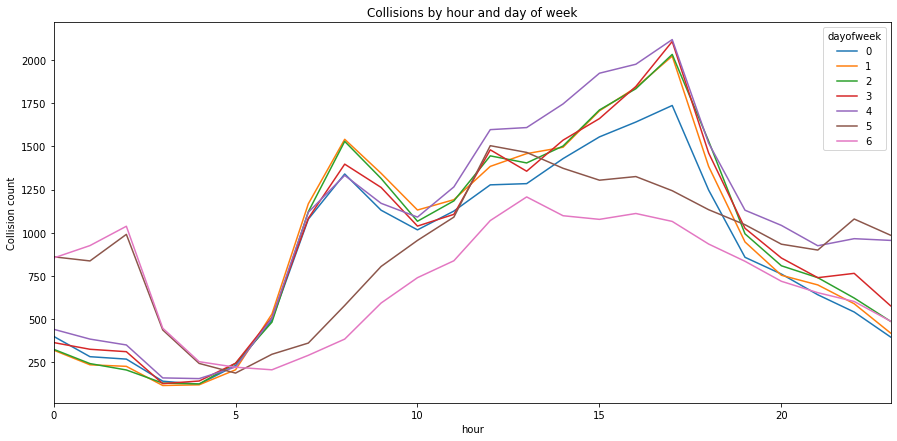

In [8]:
#df_hour=df_complete.groupby(["hour","dayofweek"])["IsSevere"].count().reset_index(name="count")
fig, ax = plt.subplots(figsize=(15,7))
plt.ylabel("Collision count")
plt.title("Collisions by hour and day of week")
df_complete.groupby(["hour","dayofweek"]).count()["IsSevere"].unstack().plot(ax=ax)

<p>Given these two graphs we can identify a common trend, as more collisions are registered during Friday, and less on Sunday.  Same can be said from Hour of day, where most accidents occur during midnight as well as in the afternoon. </p>

<p>In relationship to the weather conditions, we can note that the chances of a Collision increases with a cloudy sky:</p>

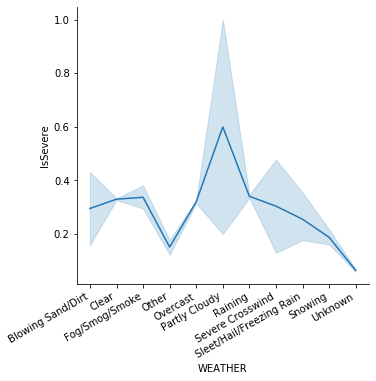

In [9]:

g = sns.relplot(x="WEATHER", y="IsSevere", kind="line", data=df_complete)
g.fig.autofmt_xdate()

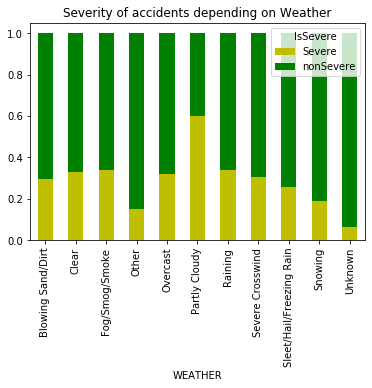

In [10]:
#df_collisions_day=df_complete.groupby("year").count()["IsSevere"]
table_W=pd.pivot_table(df_complete, values="SEVERITYCODE",index=["WEATHER"],columns=["IsSevere"],aggfunc='count')
#table_road["sum"]=table_road["0"]+table_road["1"]
table_W.reset_index(inplace=True)

table_W["Severe"]=table_W[1]/(table_W[1]+table_W[0])
table_W["nonSevere"]=table_W[0]/(table_W[1]+table_W[0])
table_W.drop(0,1, inplace=True)
table_W.drop(1,1, inplace=True)
table_W.reset_index(drop=True,inplace=True)
table_W.reset_index(drop=True,inplace=True)
table_W.set_index("WEATHER",inplace=True)

table_W.plot(kind="bar", stacked=True, color=["y","g"], title="Severity of accidents depending on Weather")



<p>A similar assessment can be made for the condition of the road:</p>

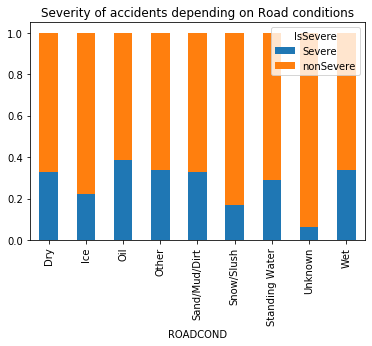

In [11]:
#df_collisions_day=df_complete.groupby("year").count()["IsSevere"]
table_road=pd.pivot_table(df_complete, values="SEVERITYCODE",index=["ROADCOND"],columns=["IsSevere"],aggfunc='count')
#table_road["sum"]=table_road["0"]+table_road["1"]
table_road.reset_index(inplace=True)

table_road["Severe"]=table_road[1]/(table_road[1]+table_road[0])
table_road["nonSevere"]=table_road[0]/(table_road[1]+table_road[0])
table_road.drop(0,1, inplace=True)
table_road.drop(1,1, inplace=True)
table_road.reset_index(drop=True,inplace=True)
table_road.reset_index(drop=True,inplace=True)
table_road
table_road.set_index("ROADCOND",inplace=True)

table_road.plot(kind="bar", stacked=True,title="Severity of accidents depending on Road conditions")



<p>Analyzing the information by Year, we notice that the total number of car accidents has been in decline over the last five years.</p>

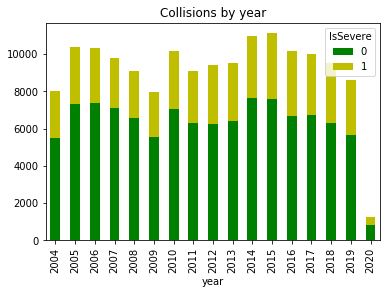

In [12]:
df_collisions_day=df_complete.groupby("year").count()["IsSevere"]
table=pd.pivot_table(df_complete, values="SEVERITYCODE",index=["year"],columns=["IsSevere"],aggfunc='count')
table.plot(kind="bar", stacked=True, color=["g","y"])
#df_collisions_day[["day"]].plot(kind="line")
plt.title("Collisions by year")
plt.show()

<p>Analyzing the information by Year, we notice that the total number of car accidents has been in decline over the last five years.</p>

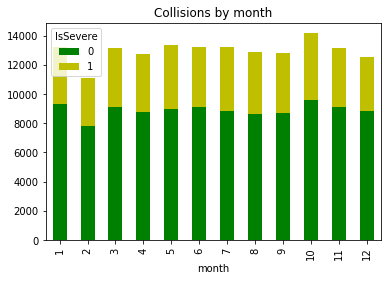

In [13]:
df_collisions_day=df_complete.groupby("month").count()["IsSevere"]
table=pd.pivot_table(df_complete, values="SEVERITYCODE",index=["month"],columns=["IsSevere"],aggfunc='count')
table.plot(kind="bar", stacked=True, color=["g","y"])
#df_collisions_day[["day"]].plot(kind="line")
plt.title("Collisions by month")
plt.show()

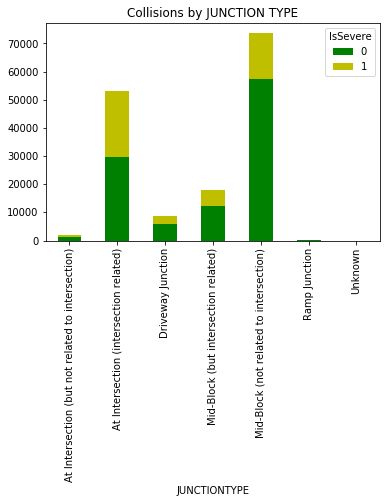

In [14]:
df_collisions_day=df_complete.groupby("JUNCTIONTYPE").count()["IsSevere"]
table=pd.pivot_table(df_complete, values="SEVERITYCODE",index=["JUNCTIONTYPE"],columns=["IsSevere"],aggfunc='count')
table.plot(kind="bar", stacked=True, color=["g","y"])
#df_collisions_day[["day"]].plot(kind="line")
plt.title("Collisions by JUNCTION TYPE")
plt.show()

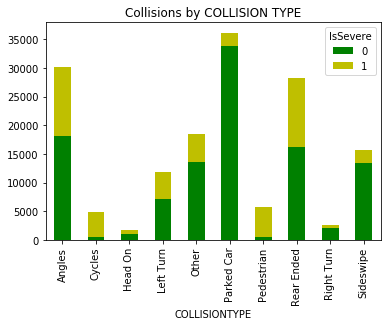

In [15]:

df_collisions_day=df_complete.groupby("COLLISIONTYPE").count()["IsSevere"]
table=pd.pivot_table(df_complete, values="SEVERITYCODE",index=["COLLISIONTYPE"],columns=["IsSevere"],aggfunc='count')
table.plot(kind="bar", stacked=True, color=["g","y"])
#df_collisions_day[["day"]].plot(kind="line")
plt.title("Collisions by COLLISION TYPE")
plt.show()

<p>Finally, we’ve plotted the correlation matrix in a heatmap for some of the attributes selected as feature variables.</p>

<p>Now we'll proceed to encode all categorical variables and create a feature dataset</p>

In [16]:
df_complete.columns
df_complete["PPerVeh"]=df_complete["PERSONCOUNT"]/df_complete["VEHCOUNT"]
#LEAVING 'JUNCTIONTYPE' OUT FOR THE MOMENT, WE'LL CHECK IF NEEDS TO BE ADDED ALTER
df_features=df_complete[['UNDERINFL','WEATHER', 'ROADCOND', 'LIGHTCOND',  'dayofweek', 'month', 'hour', 'PPerVeh', 'IsSevere']]
df_features.head()

,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,dayofweek,month,hour,PPerVeh,IsSevere
0,0,Overcast,Wet,Daylight,2,3,14,1.000000,1
1,0,Raining,Wet,Dark - Street Lights On,2,12,18,1.000000,0
2,0,Overcast,Dry,Daylight,3,11,10,1.333333,0
3,0,Clear,Dry,Daylight,4,3,9,1.000000,0
4,0,Raining,Wet,Daylight,2,1,8,1.000000,1


In [17]:
df_complete["ROADCOND"] = df_complete["ROADCOND"].astype('category')
df_complete["WEATHER"] = df_complete["WEATHER"].astype('category')
df_complete["LIGHTCOND"] = df_complete["LIGHTCOND"].astype('category')
df_complete.dtypes

SEVERITYCODE                   int64
X                            float64
Y                            float64
ADDRTYPE                      object
LOCATION                      object
COLLISIONTYPE                 object
PERSONCOUNT                    int64
VEHCOUNT                       int64
INCDATE          datetime64[ns, UTC]
INCDTTM                       object
JUNCTIONTYPE                  object
UNDERINFL                      int64
WEATHER                     category
ROADCOND                    category
LIGHTCOND                   category
timestamp             datetime64[ns]
dayofweek                      int32
Dayname                       object
month                          int64
day                            int64
year                           int64
hour                           int64
IsSevere                       int64
hour-real                     object
PPerVeh                      float64
dtype: object

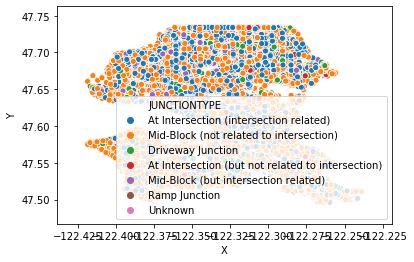

In [18]:

ax = sns.scatterplot(x="X",y="Y", hue="JUNCTIONTYPE",data=df_complete)


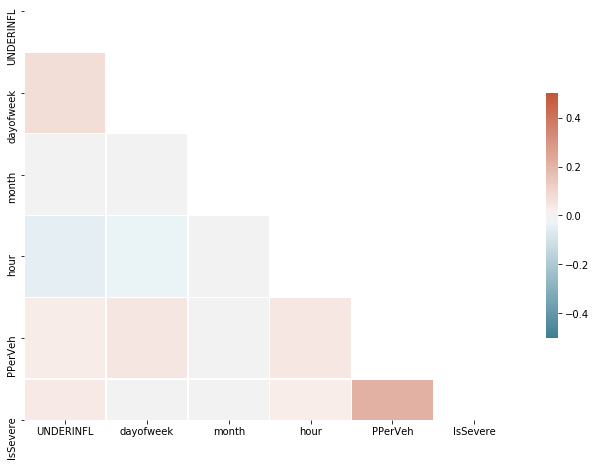

In [19]:
# Compute the correlation matrix
corr = df_features.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.5, vmin=-.5, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [20]:
df_features_encoded=pd.get_dummies(df_features, columns=["WEATHER","ROADCOND","LIGHTCOND"], prefix=["W-","R-","L-"])
df_features_encoded.columns

Index(['UNDERINFL', 'dayofweek', 'month', 'hour', 'PPerVeh', 'IsSevere',
       'W-_Blowing Sand/Dirt', 'W-_Clear', 'W-_Fog/Smog/Smoke', 'W-_Other',
       'W-_Overcast', 'W-_Partly Cloudy', 'W-_Raining', 'W-_Severe Crosswind',
       'W-_Sleet/Hail/Freezing Rain', 'W-_Snowing', 'W-_Unknown', 'R-_Dry',
       'R-_Ice', 'R-_Oil', 'R-_Other', 'R-_Sand/Mud/Dirt', 'R-_Snow/Slush',
       'R-_Standing Water', 'R-_Unknown', 'R-_Wet',
       'L-_Dark - No Street Lights', 'L-_Dark - Street Lights Off',
       'L-_Dark - Street Lights On', 'L-_Dark - Unknown Lighting', 'L-_Dawn',
       'L-_Daylight', 'L-_Dusk', 'L-_Other', 'L-_Unknown'],
      dtype='object')

In [21]:
df_features_encoded=df_features_encoded.replace([np.inf, -np.inf], np.nan)
df_features_encoded["PPerVeh"].max()
df_features_encoded.isna().sum()

UNDERINFL                        0
dayofweek                        0
month                            0
hour                             0
PPerVeh                        184
IsSevere                         0
W-_Blowing Sand/Dirt             0
W-_Clear                         0
W-_Fog/Smog/Smoke                0
W-_Other                         0
W-_Overcast                      0
W-_Partly Cloudy                 0
W-_Raining                       0
W-_Severe Crosswind              0
W-_Sleet/Hail/Freezing Rain      0
W-_Snowing                       0
W-_Unknown                       0
R-_Dry                           0
R-_Ice                           0
R-_Oil                           0
R-_Other                         0
R-_Sand/Mud/Dirt                 0
R-_Snow/Slush                    0
R-_Standing Water                0
R-_Unknown                       0
R-_Wet                           0
L-_Dark - No Street Lights       0
L-_Dark - Street Lights Off      0
L-_Dark - Street Lig

In [22]:
df_features_encoded.dropna(subset=["PPerVeh"], inplace=True)

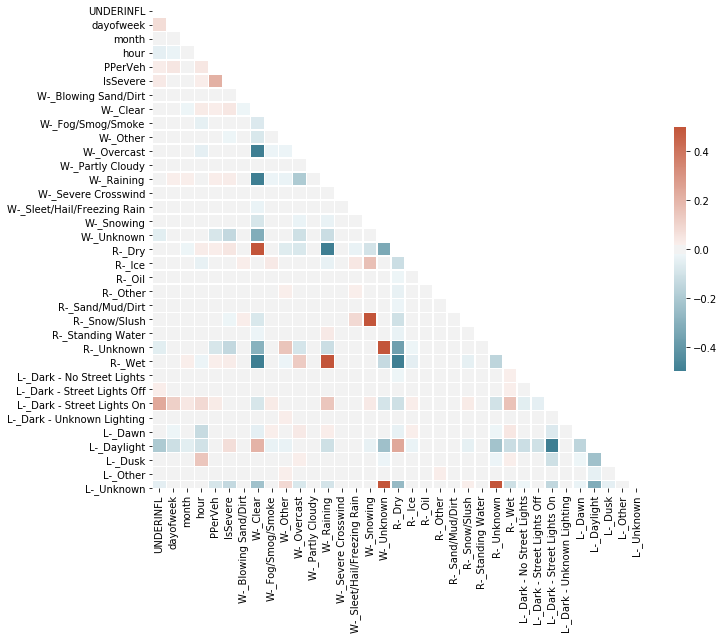

In [23]:
corr=df_features_encoded.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.5, vmin=-.5, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

<h2>Model Development</h2>

In [24]:

import scipy.optimize as opt
from sklearn import preprocessing

#Select features 
X = np.asarray(df_features_encoded[['UNDERINFL', 'dayofweek', 'month', 'hour', 'PPerVeh',
       'W-_Blowing Sand/Dirt', 'W-_Clear', 'W-_Fog/Smog/Smoke', 'W-_Other',
       'W-_Overcast', 'W-_Partly Cloudy', 'W-_Raining', 'W-_Severe Crosswind',
       'W-_Sleet/Hail/Freezing Rain', 'W-_Snowing', 'W-_Unknown', 'R-_Dry',
       'R-_Ice', 'R-_Oil', 'R-_Other', 'R-_Sand/Mud/Dirt', 'R-_Snow/Slush',
       'R-_Standing Water', 'R-_Unknown', 'R-_Wet',
       'L-_Dark - No Street Lights', 'L-_Dark - Street Lights Off',
       'L-_Dark - Street Lights On', 'L-_Dark - Unknown Lighting', 'L-_Dawn',
       'L-_Daylight', 'L-_Dusk', 'L-_Other', 'L-_Unknown']])
#normalize data
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X

array([[-0.22744945, -0.48933031, -1.03589822, ..., -0.17905812,
        -0.03078874, -0.24230805],
       [-0.22744945, -0.48933031,  1.58831503, ..., -0.17905812,
        -0.03078874, -0.24230805],
       [-0.22744945,  0.03066313,  1.29673578, ..., -0.17905812,
        -0.03078874, -0.24230805],
       ...,
       [-0.22744945,  1.07064999, -1.61905672, ..., -0.17905812,
        -0.03078874, -0.24230805],
       [-0.22744945, -1.00932374, -1.61905672, ...,  5.58477889,
        -0.03078874, -0.24230805],
       [-0.22744945,  0.55065656,  1.29673578, ..., -0.17905812,
        -0.03078874, -0.24230805]])

In [25]:
#labels
y = np.asarray(df_features_encoded['IsSevere'])
y[0:100]

array([1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0], dtype=int64)

In [26]:
#Split dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, 
                                                    test_size=0.2, 
                                                    random_state=6)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (124175, 34) (124175,)
Test set: (31044, 34) (31044,)


In [27]:
#Modeling Logistic Regresion
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.1, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
#predict
yhat = LR.predict(X_test)
yhat

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [29]:

#estimates
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.56144752, 0.43855248],
       [0.72238823, 0.27761177],
       [0.72822302, 0.27177698],
       ...,
       [0.56394948, 0.43605052],
       [0.63528604, 0.36471396],
       [0.92580778, 0.07419222]])

In [30]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
import itertools
#Confusion matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[ 1064  8593]
 [  891 20496]]


Confusion matrix, without normalization
[[ 1064  8593]
 [  891 20496]]


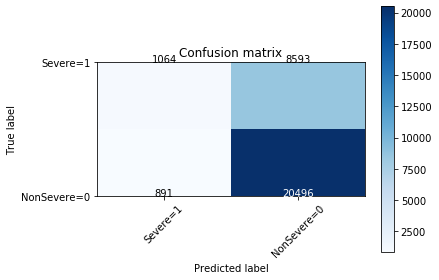

In [31]:

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Severe=1','NonSevere=0'],normalize= False,  title='Confusion matrix')

In [32]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.70      0.96      0.81     21387
           1       0.54      0.11      0.18      9657

    accuracy                           0.69     31044
   macro avg       0.62      0.53      0.50     31044
weighted avg       0.65      0.69      0.62     31044



In [33]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, yhat))

DecisionTrees's Accuracy:  0.6944981316840614


In [34]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.5814355282996011

In [89]:
y_hat_LR=yhat
F1lr=f1_score(y_test, y_hat_LR,average='weighted')
Jclr=metrics.accuracy_score(y_test, y_hat_LR)
LLlr=log_loss(y_test, yhat_prob)

<h1>knn</h1>

In [54]:
#classification
from sklearn.neighbors import KNeighborsClassifier
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [55]:

#predict
yhat_knn = neigh.predict(X_test)
yhat_knn[0:5]

array([0, 0, 0, 1, 1], dtype=int64)

In [56]:

#Metrics
from sklearn import metrics
#print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat_knn))

Test set Accuracy:  0.6899884035562428


In [ ]:


#instead of trying with another K, we will automate the process:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat_knn=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat_knn)

    
    std_acc[n-1]=np.std(yhat_knn==y_test)/np.sqrt(yhat_knn.shape[0])

mean_acc

In [ ]:
#plot Ks vs accuracy
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [90]:

F1knn=f1_score(y_test, yhat_knn,average='weighted')
Jcknn=metrics.accuracy_score(y_test,yhat_knn)

<h1>Classification tree</h1>

In [35]:
from sklearn.tree import DecisionTreeClassifier
CollisionTree = DecisionTreeClassifier(criterion="entropy", max_depth = 8)


In [36]:
CollisionTree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=8,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [37]:
predTree = CollisionTree.predict(X_test)

In [38]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

DecisionTrees's Accuracy:  0.7241334879525835


In [59]:

#Classification Tree metrics
from sklearn.metrics import f1_score, accuracy_score,jaccard_similarity_score,log_loss,jaccard_score
y_hat_tree = predTree
F1tree=f1_score(y_test, y_hat_tree,average='weighted')
Jctree=metrics.accuracy_score(y_test,y_hat_tree)

<h2>SVM</h2>

In [51]:
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import make_pipeline



clf = SGDClassifier(max_iter=10000000, tol=1e-3)
clf.fit(X_train, y_train)



#clf = svm.SVC(kernel='rbf')
#clf.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=10000000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [52]:
#predict
yhat_SVM = clf.predict(X_test)
yhat_SVM [0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [53]:

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat_SVM, labels=[2,4])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat_SVM))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Benign(2)','Malignant(4)'],normalize= False,  title='Confusion matrix')

ValueError: At least one label specified must be in y_true

In [88]:

f1_score(y_test, yhat_SVM, average='weighted')
F1svm=f1_score(y_test, yhat_SVM,average='weighted')
Jcsvm=metrics.accuracy_score(y_test,yhat_SVM)

In [100]:
# Create report dataframe
report=pd.DataFrame(columns=["Algorithm","Accuracy","F1-score","LogLoss"])

Knn_dict={"Algorithm":"KNN","Accuracy":Jcknn,"F1-score":F1knn ,"LogLoss":"NA"}
Tree_dict={"Algorithm":"Decision Tree","Accuracy":Jctree,"F1-score":F1tree,"LogLoss":"NA"}
SVM_dict={"Algorithm":"SVM","Accuracy":Jcsvm,"F1-score":F1svm,"LogLoss":"NA"}
Log_dict={"Algorithm":"Logistic Regression","Accuracy":Jclr,"F1-score":F1lr,"LogLoss":LLlr}

report=report.append(Knn_dict, ignore_index=True)
report=report.append(Tree_dict, ignore_index=True)
report=report.append(SVM_dict, ignore_index=True)
report=report.append(Log_dict, ignore_index=True)

In [101]:
report

,Algorithm,Accuracy,F1-score,LogLoss
0,KNN,0.689988,0.644820,NA
1,Decision Tree,0.265019,0.694656,NA
2,SVM,0.690697,0.580981,NA
3,Logistic Regression,0.694498,0.616489,0.581436


<h1>ROC curves</h1>

In [86]:
from sklearn.metrics import roc_curve
#Logistic regression
scores = LR.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, scores)
#class tree
scores_c = CollisionTree.predict_proba(X_test)[:,1]
fpr_c, tpr_c, thresholds_c = roc_curve(y_test, scores_c)
#knn
#yhat_knn = neigh.predict(X_test)
scores_k = neigh.predict_proba(X_test)[:,1]
fpr_k, tpr_k, thresholds_k = roc_curve(y_test, scores_k)

In [92]:
#yhat_SVM = clf.predict(X_test)
#scores_s = clf.predict(X_test)
fpr_s, tpr_s, thresholds_s = roc_curve(y_test, yhat_SVM)

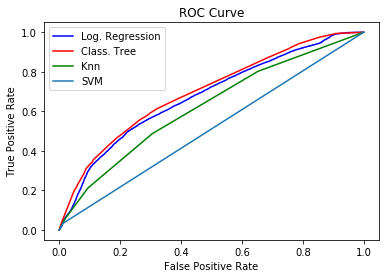

In [98]:

plt.plot(fpr, tpr, color="b", label="Log. Regression")
plt.plot(fpr_c, tpr_c, color="r", label="Class. Tree")
plt.plot(fpr_k, tpr_k, color="g", label="Knn")
plt.plot(fpr_s, tpr_s, label="SVM")
plt.title("ROC Curve")
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()